## BIKE RENTAL COUNT

 the hourly  count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.
Bike sharing counts aggregated on hourly basis (hour.csv - 17379 rows, 17 columns)

#### Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

#### load data

In [2]:
bike = pd.read_csv('hour.csv',parse_dates = ['dteday'],low_memory = False,index_col = ['instant'],infer_datetime_format = True )
bike.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike.rename({'dteday' : 'date'},inplace = True,axis =1)
bike['date'] = pd.to_datetime(bike['date'])
bike.head()

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike.shape

(17379, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [6]:
bike.isnull().sum()

date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike_original = bike.copy()

#### Exploratory Data Analysis

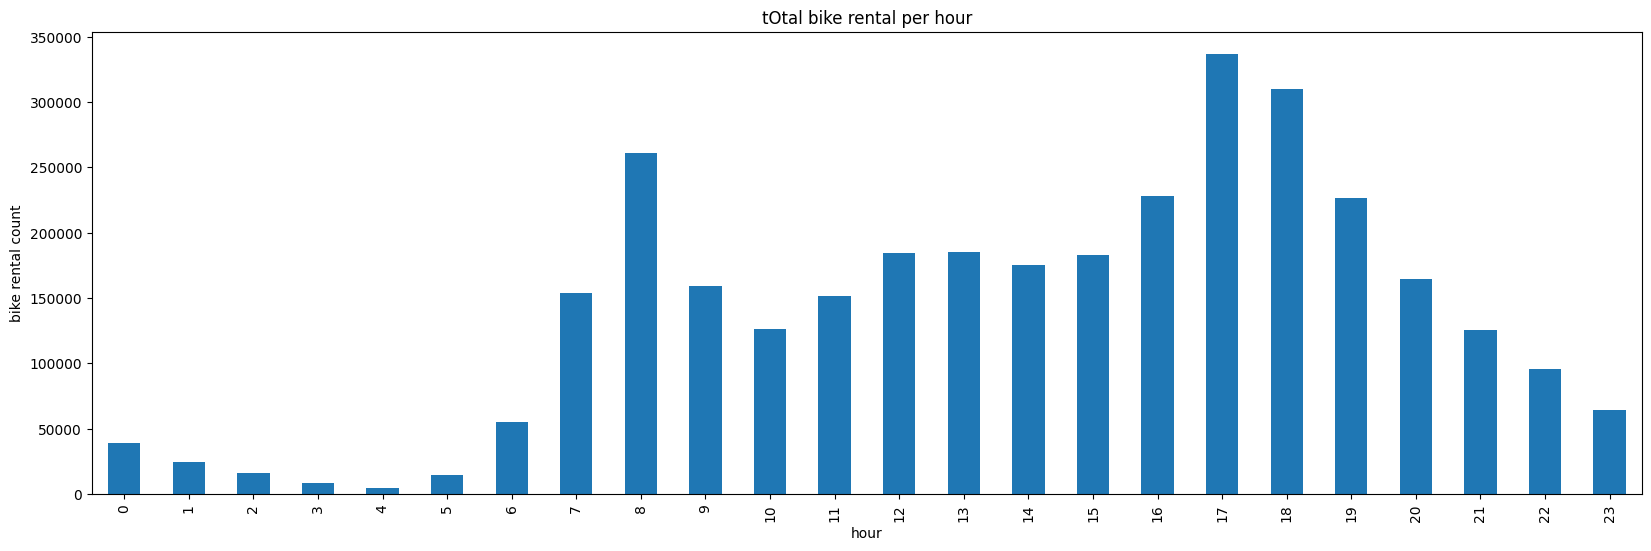

In [8]:
# total number of bike rental per hr
(bike.groupby('hr')['cnt'].sum()).plot.bar(figsize = (20,6))
plt.title('tOtal bike rental per hour')
plt.xlabel('hour')
plt.ylabel('bike rental count');

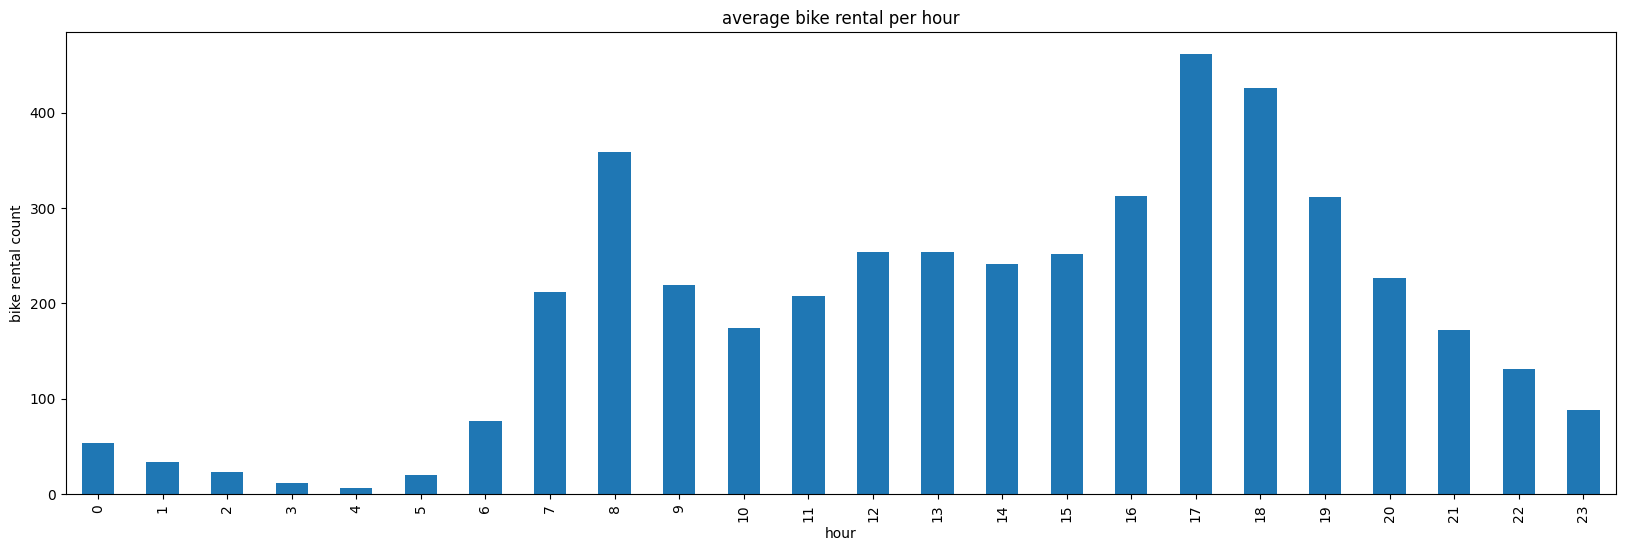

In [9]:
# average bike rantal count
(bike.groupby('hr')['cnt'].mean()).plot.bar(figsize = (20,6))
plt.title('average bike rental per hour')
plt.xlabel('hour')
plt.ylabel('bike rental count');

#### observation :
* There is a low bike rental from 12am to 4am but begins to raise from 5am and peaks at 8am and the begins to decline
* The bike rental from 9am to 3pm are almost the same 
* Bike rental again peaks at 5pm in the evening and begins to experience a decline till the next day
* Average bike rental for 5pm is around 400 to 500

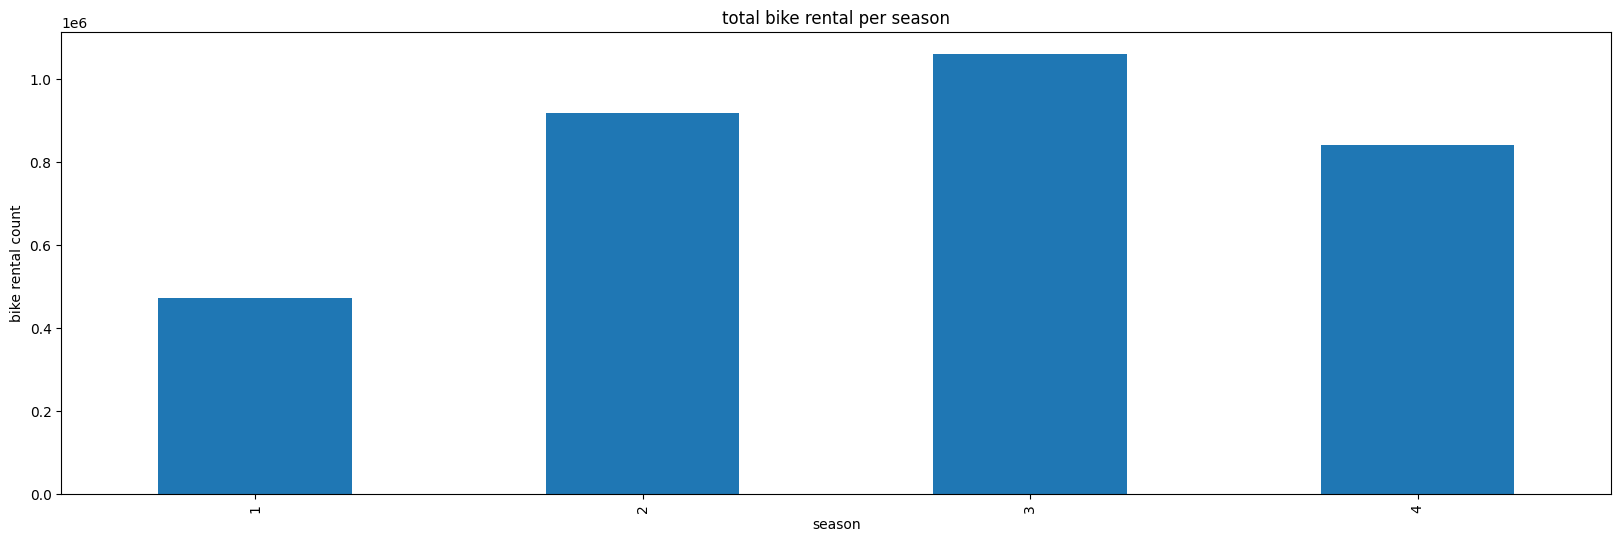

In [10]:
# total bike rental per season
(bike.groupby('season')['cnt'].sum()).plot.bar(figsize = (20,6))
plt.title('total bike rental per season')
plt.xlabel('season')
plt.ylabel('bike rental count');

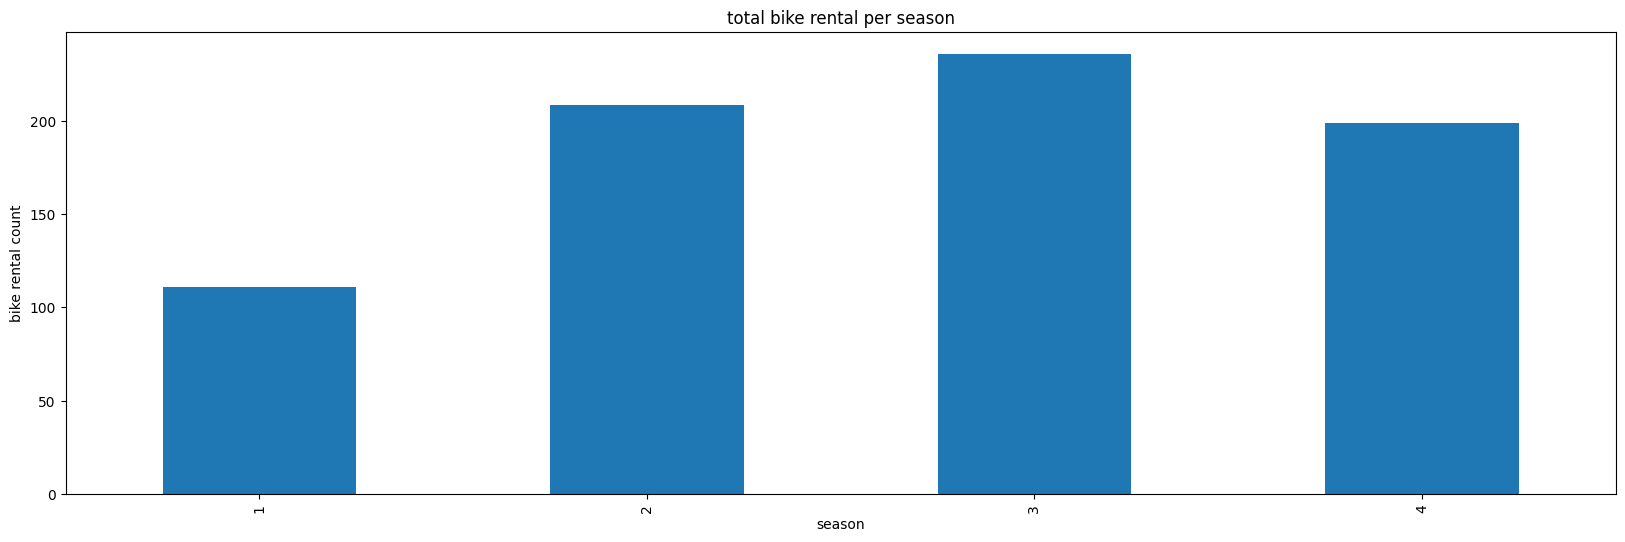

In [11]:
# average bike rental per season
(bike.groupby('season')['cnt'].mean().plot.bar(figsize = (20,6)))
plt.title('total bike rental per season')
plt.xlabel('season')
plt.ylabel('bike rental count');

1 --------> springer 

2---------> summer

3---------> fall

4 -------> winter


#### observation :
* There is low bike rental durong spring
* Much of bike rental are done in fall followed by summer

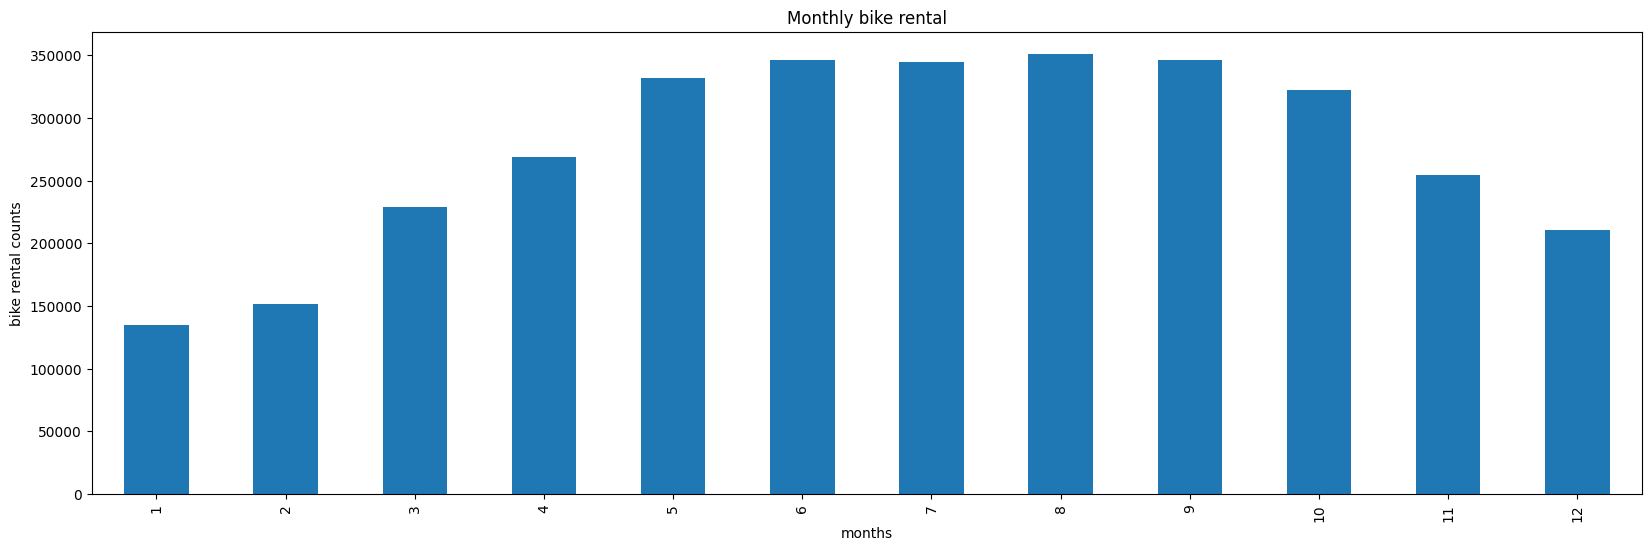

In [12]:
# monthly bike rental
(bike.groupby('mnth')['cnt'].sum()).plot.bar(figsize = (20,6))
plt.title('Monthly bike rental')
plt.xlabel('months')
plt.ylabel('bike rental counts');

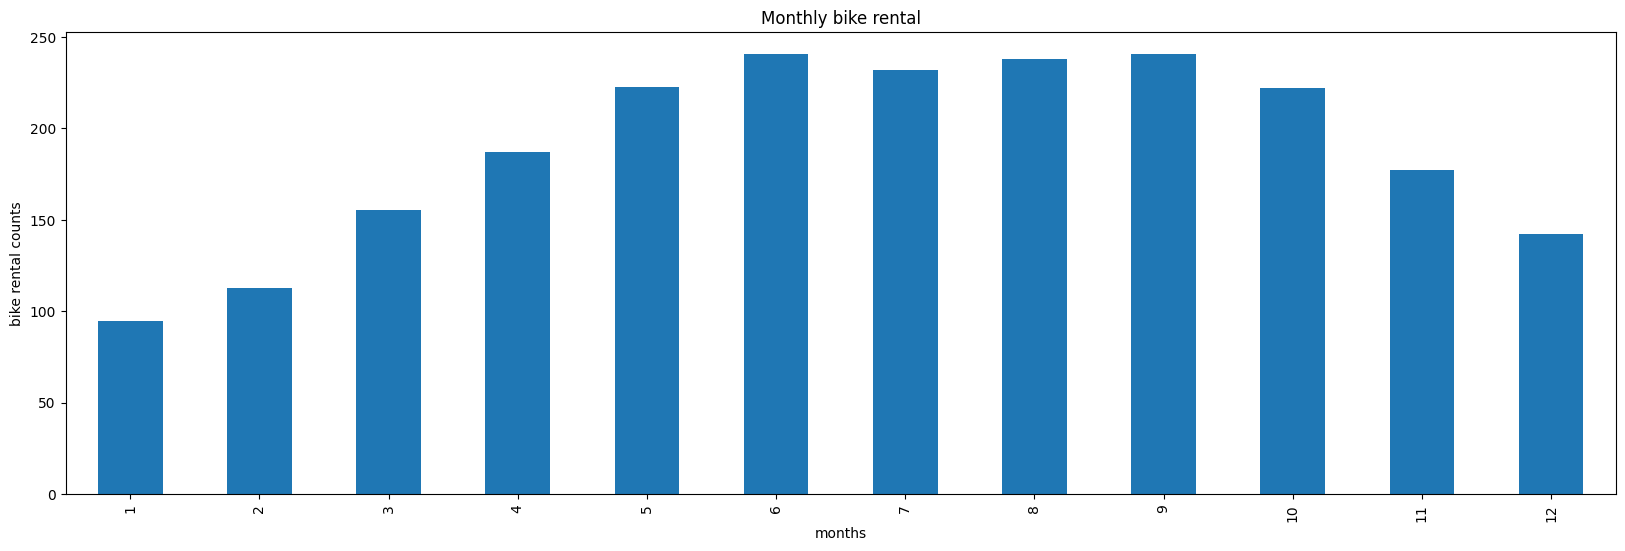

In [13]:
# average monthly bike rental
(bike.groupby('mnth')['cnt'].mean()).plot.bar(figsize = (20,6))
plt.title('Monthly bike rental')
plt.xlabel('months')
plt.ylabel('bike rental counts');

#### observation : 
* monthly bike rental shows a uniform distribution
* May to September has the highest bike rental
* A decline from November to february

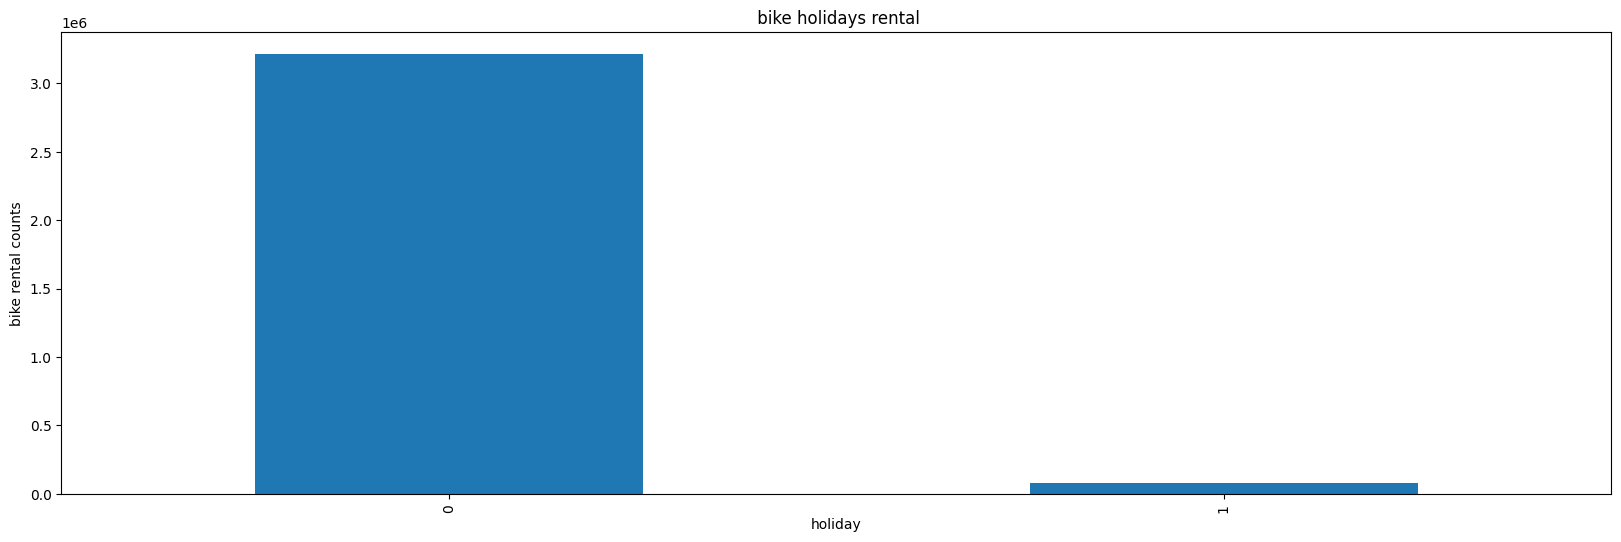

In [14]:
# total bike rental on holidays
(bike.groupby('holiday')['cnt'].sum()).plot.bar(figsize = (20,6))
plt.title(' bike holidays rental')
plt.xlabel('holiday')
plt.ylabel('bike rental counts');

0 ----> no holiday

1 -----> holiday

#### observation :
Most bike rental are done on days when dey are no holiays which implies that most costumers are working class population

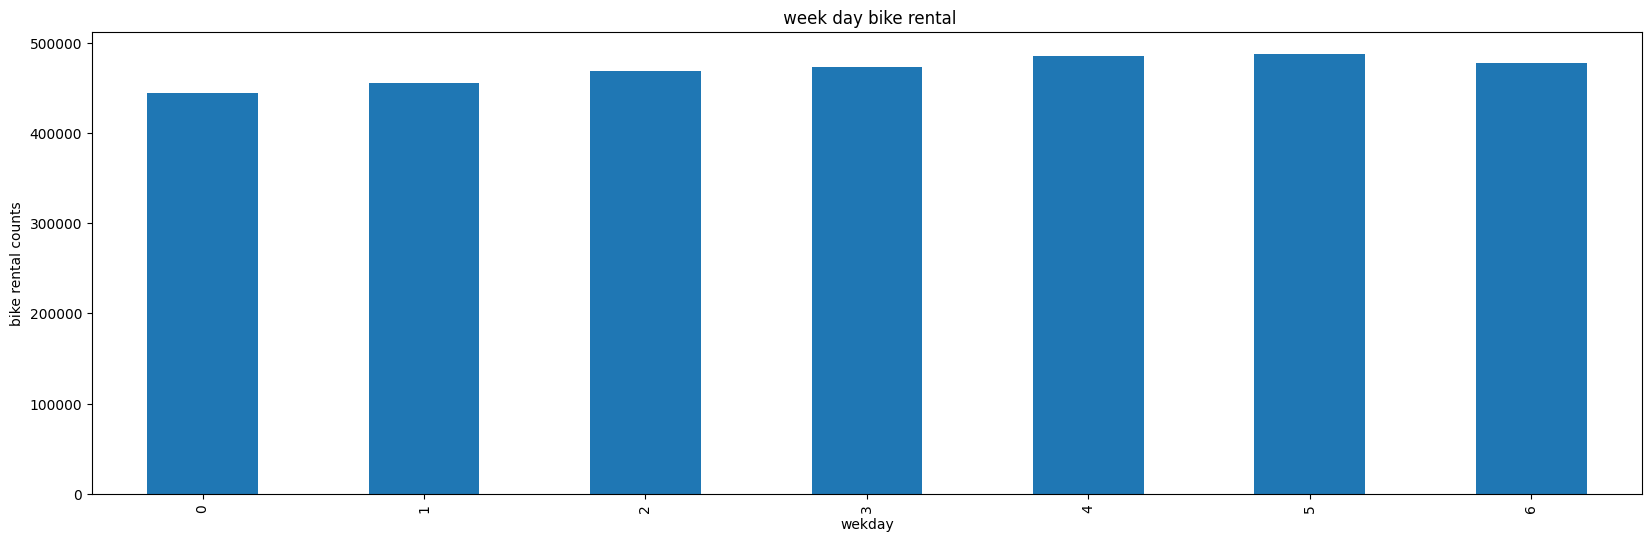

In [15]:
# weekday bike rental
(bike.groupby('weekday')['cnt'].sum()).plot.bar(figsize = (20,6))
plt.title(' week day bike rental')
plt.xlabel('wekday')
plt.ylabel('bike rental counts');

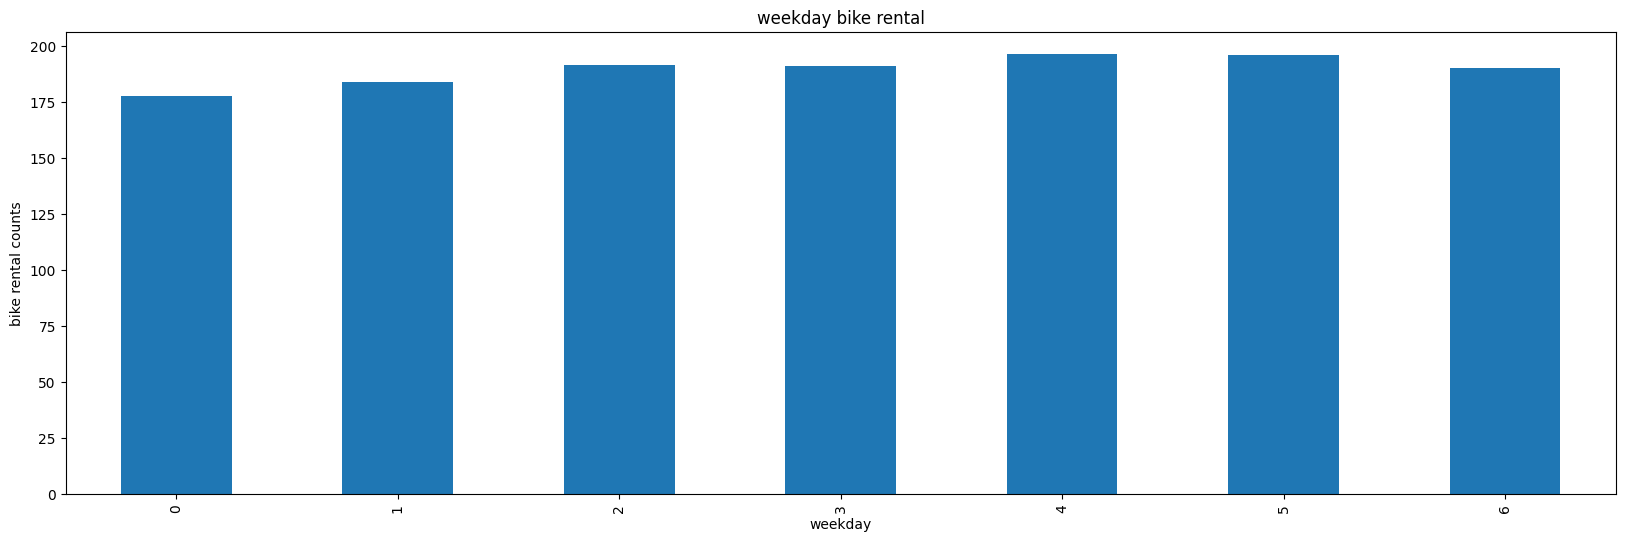

In [16]:
(bike.groupby('weekday')['cnt'].mean()).plot.bar(figsize = (20,6))
plt.title('weekday bike rental')
plt.xlabel('weekday')
plt.ylabel('bike rental counts');

#### observation :
* Each day of the week has equal amount of bike rental
* The average bike rental per day is between the range of 175 to 200

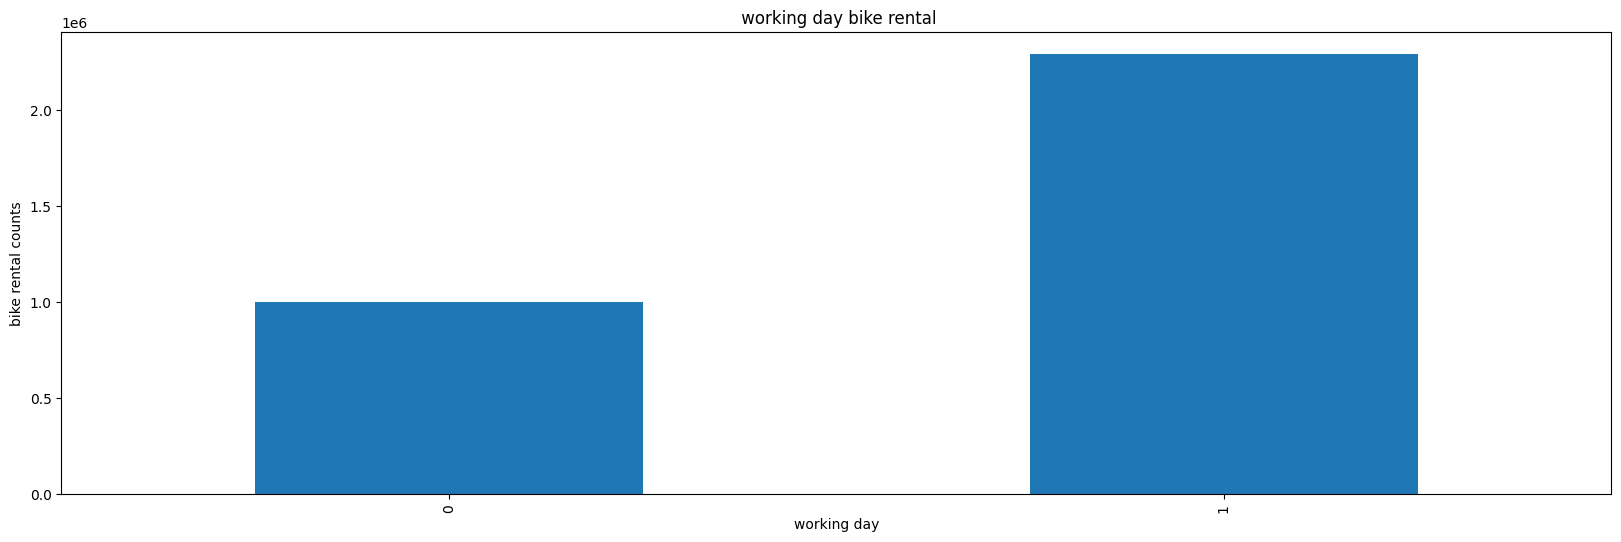

In [17]:
# working day bike rental
(bike.groupby('workingday')['cnt'].sum()).plot.bar(figsize = (20,6))
plt.title(' working day bike rental')
plt.xlabel('working day')
plt.ylabel('bike rental counts');

0 ----> not working day
1 ----> working day

#### observation :
* Most bike rental are done on working days showing most customers are working class

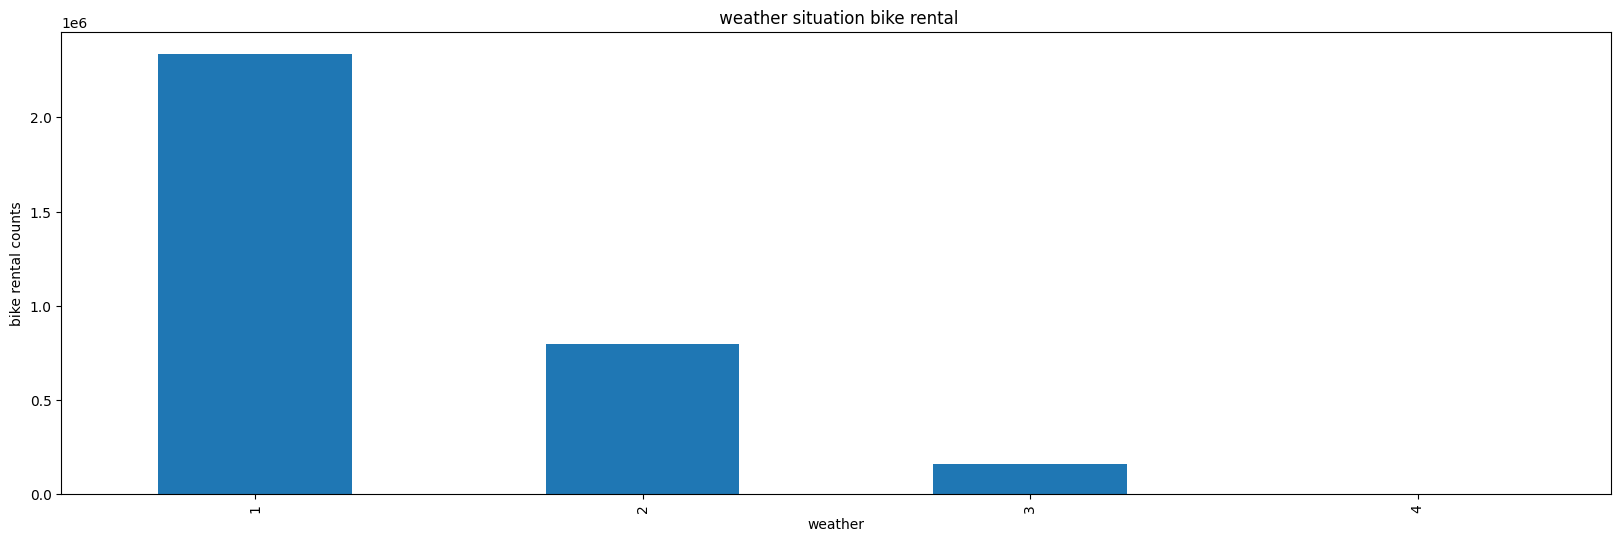

In [18]:
(bike.groupby('weathersit')['cnt'].sum()).plot.bar(figsize = (20,6))
plt.title(' weather situation bike rental')
plt.xlabel('weather')
plt.ylabel('bike rental counts');

1: Clear, Few   clouds, Partly cloudy, Partly cloudy; 

2: Mist + Cloudy, Mist + Broken clouds,   Mist + Few clouds, Mist; 

3: Light Snow, Light Rain + Thunderstorm + Scattered   clouds, Light Rain + Scattered clouds,

4: Heavy Rain + Ice Pallets +   Thunderstorm + Mist, Snow + Fog

#### observation :
* 1 - ( Clear, Few   clouds, Partly cloudy, Partly cloudy)  prompt people to rent bikes, which is sometime we can't control

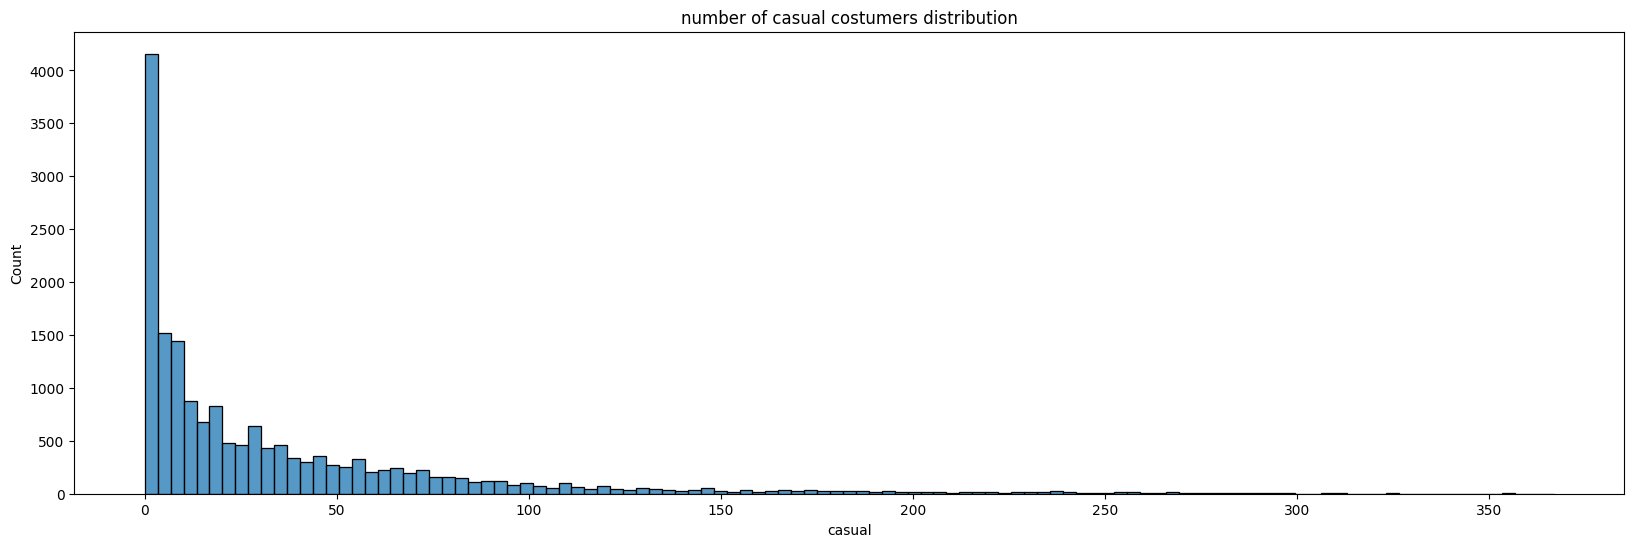

In [19]:
# Total causual customers
plt.figure(figsize = (20,6))
sns.histplot(bike['casual'])
plt.title('number of casual costumers distribution');

#### observation :
* the Range of casual costumer for bike rental is from 0 to 100 people per hour

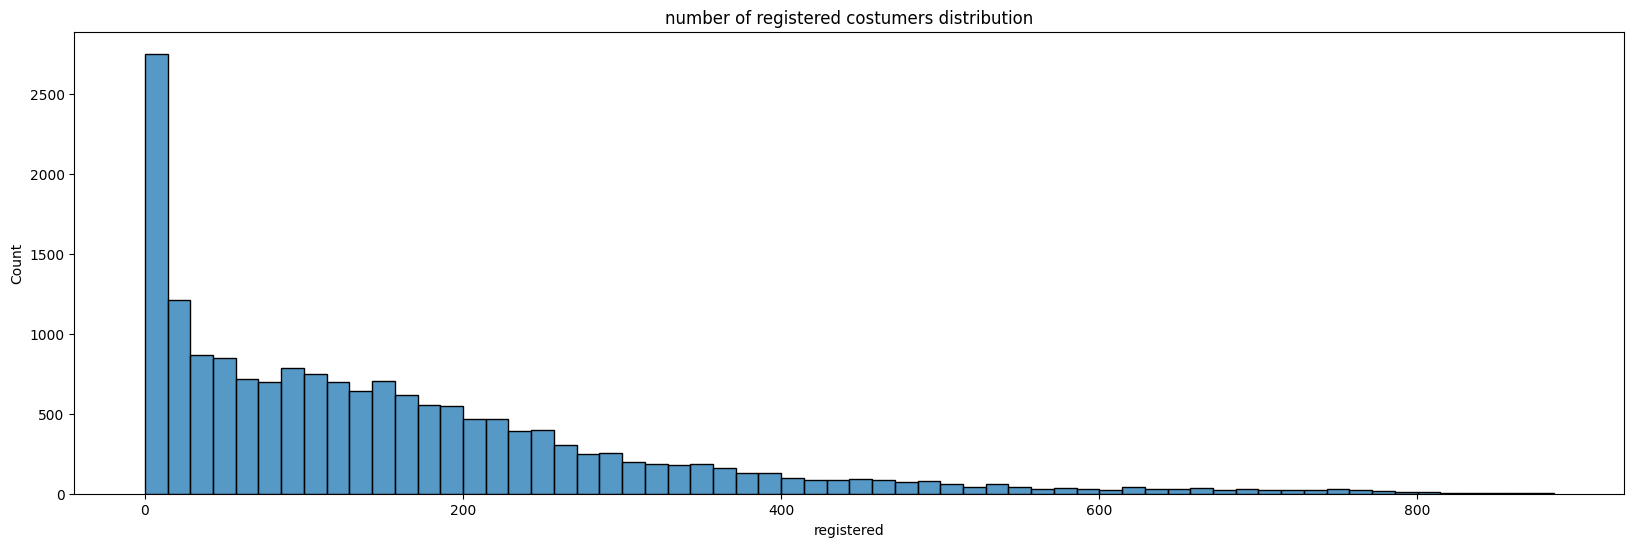

In [20]:
# registered costumer
plt.figure(figsize = (20,6))
sns.histplot(bike['registered'])
plt.title('number of registered costumers distribution');

#### observation :
* the major count of registered costumers renges from 0 - 400 people

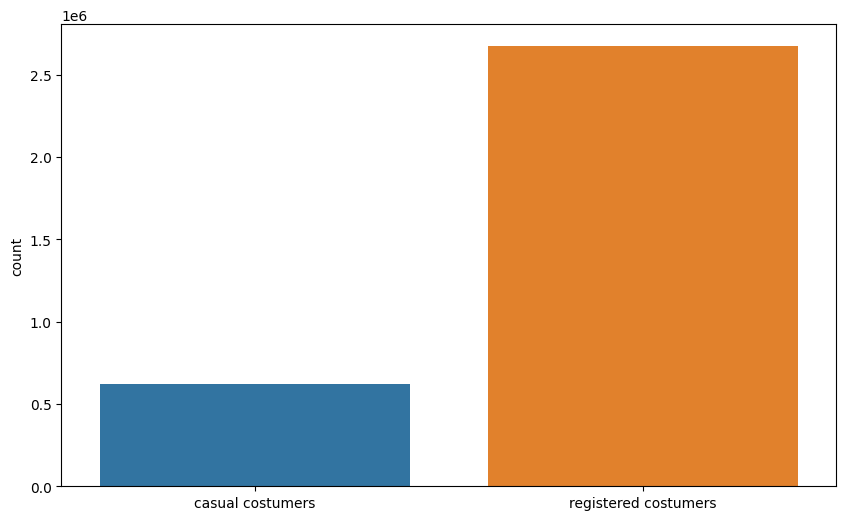

In [21]:
casual_reg = pd.DataFrame({'casual costumers' : bike['casual'].sum(),
              'registered costumers' : bike['registered'].sum()},index = [0])
plt.figure(figsize = (10,6))
sns.barplot(casual_reg)
plt.ylabel('count');

#### observation :
Mostly registered costumers makes use of the bike rental. Clear difference between categories

#### MOdelling

In [22]:
bike['day'] = bike['date'].dt.day
bike.drop('date',axis = 1,inplace = True)
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
instant,,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [23]:
# spliting into x and y
x = bike.drop('cnt',axis = 1)
y = bike['cnt']

# splitting into training , valid and test set
train_split = round(0.7 * len(bike))
valid_split = round(train_split + 0.15 * len(bike))

x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split : valid_split],y[train_split : valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]

C:\Users\user\AppData\Local\Temp\ipykernel_8736\2286674549.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x_train,y_train = x[:train_split],y[:train_split]
C:\Users\user\AppData\Local\Temp\ipykernel_8736\2286674549.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x_valid,y_valid = x[train_split : valid_split],y[train_split : valid_split]
C:\Users\user\AppData\Local\Temp\ipykernel_8736\2286674549.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype in

In [24]:
x_train.shape , x_valid.shape , x_test.shape

((12165, 15), (2607, 15), (2607, 15))

In [25]:
# instantiate model
model = RandomForestRegressor(random_state = 42)

In [26]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

#### Evaluation metrics

In [27]:
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


def evaluation_metrics(model) :
    train_preds = model.predict(x_test)
    valid_preds = model.predict(x_valid)
    output_df = {'training MAE' : mean_absolute_error(y_test,train_preds),
                 'valid MAE' : mean_absolute_error(y_valid,valid_preds),
                 'training rmsle' : rmsle(y_test,train_preds),
                 'valid rmsle' : rmsle(y_valid,valid_preds),
                 'training r2_score' : r2_score(y_test,train_preds),
                 'valid_r2_score' : r2_score(y_valid,valid_preds)}
    return pd.DataFrame(output_df,index = ['scores'])

In [28]:
evaluation_metrics(model)

,training MAE,valid MAE,training rmsle,valid rmsle,training r2_score,valid_r2_score
scores,3.929973,3.058389,0.021511,0.014749,0.995535,0.998428


#### using crossval score

In [29]:
# cross validated MAE
MAE = cross_val_score(model,x,y,cv = 5,scoring = 'neg_mean_absolute_error')


In [30]:
print(f'cross validated MAE : {MAE.mean()}')

cross validated MAE : -1.3498365868318003


#### Making predictions

In [31]:
# making predictions with the x_test
prediction = model.predict(x_test)

In [32]:
outcome = pd.DataFrame(columns = ['expected counts', 'predicted counts'])
outcome['expected counts'] = y_test
outcome['predicted counts'] = prediction
outcome['absolute diffirence'] = (y_test - prediction).abs().round(2)

In [33]:
outcome[:10]

,expected counts,predicted counts,absolute diffirence
instant,,,
14773,925,850.10,74.90
14774,977,805.27,171.73
14775,635,633.38,1.62
14776,470,469.41,0.59
14777,306,306.30,0.30
14778,212,210.67,1.33
14779,127,126.57,0.43
14780,57,57.07,0.07
14781,28,28.08,0.08


In [34]:
# save model
joblib.dump(model, 'bike prediction model.pkl') 

['bike prediction model.pkl']

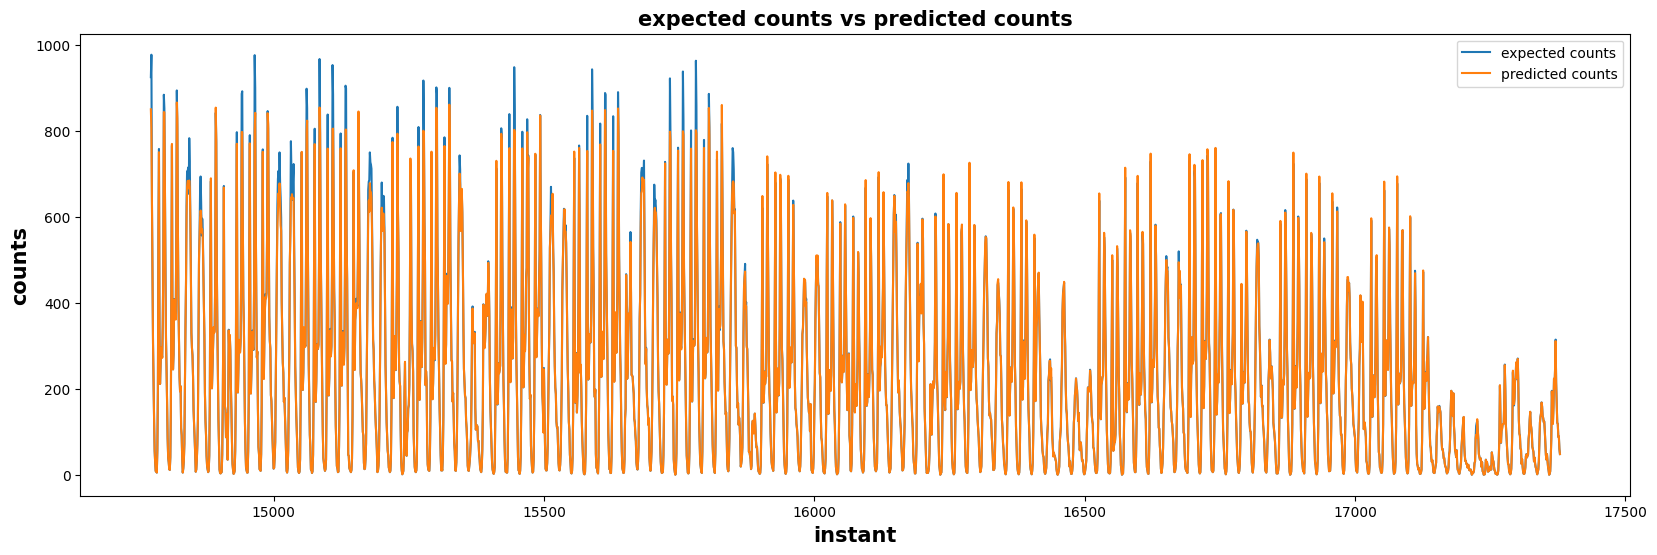

In [40]:
plt.figure(figsize = (20,6))
outcome['expected counts'].plot( label = 'expected counts')
outcome['predicted counts'].plot(label = 'predicted counts')
plt.ylabel('counts',fontweight = 'bold',fontsize = 15)
plt.xlabel('instant',fontweight = 'bold',fontsize = 15)
plt.title('expected counts vs predicted counts',fontweight = 'bold',fontsize = 15)
plt.legend();